# Model Testing Notebook

Notebook for testing and gather statistics for the lifout paper

In [18]:

import liftout
from autoscript_sdb_microscope_client.structures import AdornedImage
from liftout.detection.detection import Detector

from liftout import utils
import matplotlib.pyplot as plt

import os


In [16]:
liftout_path = os.path.join(os.path.dirname(liftout.__file__))

print(liftout_path)

settings = utils.load_config(os.path.join(liftout_path, "protocol_liftout.yml"))

fname = os.path.join(liftout_path, "tools", "test_image.tif")
detector = Detector(weights_file=os.path.join(liftout_path, "model/models", settings["machine_learning"]["weights"]))

# load image from file
img = AdornedImage.load(fname)

# model inference
mask = detector.detection_model.model_inference(img.data)

c:\users\admin\github\autoliftout\liftout


## Inference Speed Test

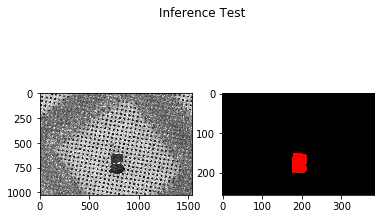

In [21]:
fig, ax = plt.subplots(1, 2)
fig.suptitle("Inference Test")

ax[0].imshow(img.data, cmap="gray")
ax[1].imshow(mask, cmap="gray")
plt.show()

In [30]:
print("GPU Statistics")
detector.detection_model.device = "cuda:0"
detector.detection_model.model.to("cuda:0")
%timeit mask = detector.detection_model.model_inference(img.data)

print("CPU Statistics")
detector.detection_model.device = "cpu"
detector.detection_model.model.to("cpu")
%timeit mask = detector.detection_model.model_inference(img.data)

GPU Statistics
25.3 ms ± 97.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
CPU Statistics
221 ms ± 2.28 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [51]:

import os
import liftout
from liftout import utils
from liftout.fibsem import acquire
from liftout import detection

import numpy as np
import liftout
from autoscript_sdb_microscope_client.structures import AdornedImage
from liftout.detection.detection import Detector

from liftout import utils
import matplotlib.pyplot as plt

import os
import glob

liftout_path = os.path.join(os.path.dirname(liftout.__file__))
print(liftout_path)

settings = utils.load_config(os.path.join(liftout_path, "protocol_liftout.yml"))

detector = Detector(weights_file=os.path.join(liftout_path, "model/models", settings["machine_learning"]["weights"]))

c:\users\admin\github\autoliftout\liftout


## Gamma Correction
Gamma correction examples

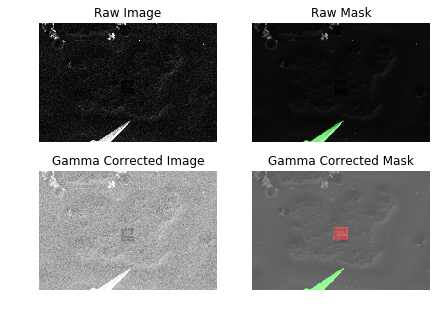

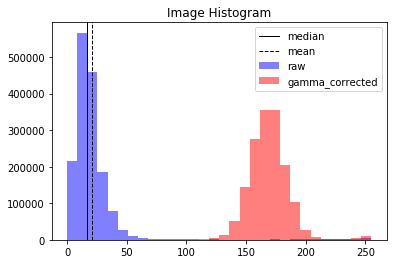

In [47]:
# load image from file
fname = os.path.join(liftout_path, "tools", "gamma_example.tif")
img = AdornedImage.load(fname)

# model inference
mask = detector.detection_model.model_inference(img.data)
mask_overlay = detection.detection.draw_overlay(img.data, mask, show=False)

# gamma corrected image
min_gamma = settings["gamma"]["min_gamma"]
max_gamma = settings["gamma"]["max_gamma"]
scale_factor = settings["gamma"]["scale_factor"]
threshold = settings["gamma"]["threshold"]
gamma_img = acquire.gamma_correction(img, min_gamma, max_gamma, scale_factor, threshold)

# gamma corected detection
gamma_mask = detector.detection_model.model_inference(gamma_img.data)

gamma_overlay = detection.detection.draw_overlay(gamma_img.data, gamma_mask, show=False)


fig, ax = plt.subplots(2, 2, figsize=(7, 5))
plt.axis("off")
ax[0, 0].set_title("Raw Image")
ax[0, 0].imshow(img.data, cmap="gray")
ax[0, 0].axis("off")

ax[0, 1].set_title("Raw Mask")
ax[0, 1].imshow(mask_overlay)
ax[0, 1].axis("off")


ax[1, 0].set_title("Gamma Corrected Image")
ax[1, 0].imshow(gamma_img.data, cmap="gray")
ax[1, 0].axis("off")

ax[1, 1].set_title("Gamma Corrected Mask")
ax[1, 1].imshow(gamma_overlay)
ax[1, 1].axis("off")

plt.show()

""" Gamma Corrected Image Histogram"""
bins = 30
bin_counts, bin_edges = np.histogram(img.data, bins)
fig = plt.Figure(figsize=(10, 5))
plt.title("Image Histogram")
plt.hist(img.data.ravel(), bins, color="blue", label="raw", alpha=0.5)
plt.hist(gamma_img.data.ravel(), bins, color="red", label="gamma_corrected", alpha=0.5)
plt.axvline(np.median(img.data), color='k', linestyle='solid', linewidth=1, label = "median")
plt.axvline(np.mean(img.data), color='k', linestyle='dashed', linewidth=1, label="mean")
plt.legend(loc="best")

plt.show()


## Detection Example
Example for the machine learning detections 

2
c:\users\admin\github\autoliftout\liftout\tools\example\lamella_centre.tif


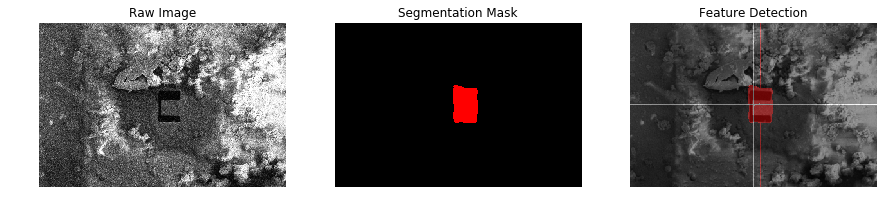

c:\users\admin\github\autoliftout\liftout\tools\example\needle_lamella.tif


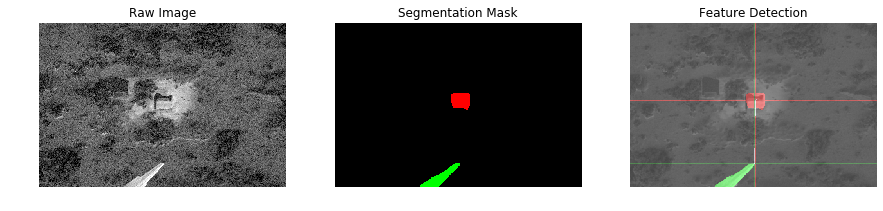

In [72]:
# load image from file
# fname = os.path.join(liftout_path, "tools", "gamma_example.tif")

filenames = sorted(glob.glob(os.path.join(liftout_path, "tools", "example", "*.tif")))
print(len(filenames))


filenames = [os.path.join(liftout_path, "tools", "example", "lamella_centre.tif"), 
             os.path.join(liftout_path, "tools", "example", "needle_lamella.tif")]
shift_types = ["lamella_centre_to_image_centre", "needle_tip_to_lamella_centre"]


# load detector
detector = Detector(weights_file=os.path.join(liftout_path, "model/models", settings["machine_learning"]["weights"]))

               
for fname, shift_type in zip(filenames, shift_types):
    
    print(fname)
    
    # raw image
    img = AdornedImage.load(fname)
    
    # segmentationmask
    mask = detector.detection_model.model_inference(img.data)

    # image with detection overlays
    (image_w_overlay, downscaled_image, feature_1_px, feature_1_type, feature_2_px,feature_2_type,
        ) = detector.locate_shift_between_features(img, shift_type=shift_type, show=False)
    
    fig, ax = plt.subplots(1, 3, figsize=(15, 15))
    
    ax[0].imshow(img.data, cmap="gray")
    ax[0].set_title("Raw Image")
    ax[0].axis("off")
    ax[1].imshow(mask)
    ax[1].set_title("Segmentation Mask")
    ax[1].axis("off")
    ax[2].imshow(image_w_overlay)
    ax[2].set_title("Feature Detection")
    ax[2].axis("off")
    plt.show()